## Take a look at the data

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [96]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [97]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


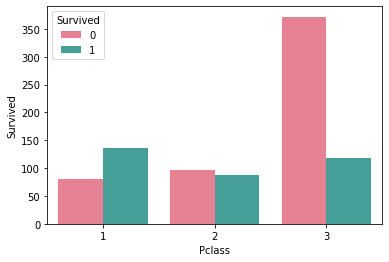

In [103]:
##Pclass
# survival rate
display(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean())
# survival amount vs dead amount
chart = sns.barplot(x='Pclass', y='Survived', hue = 'Survived', order=[1,2,3], estimator=len, palette="husl", data=train, ci=None)

,Sex,Survived
0,female,0.742038
1,male,0.188908


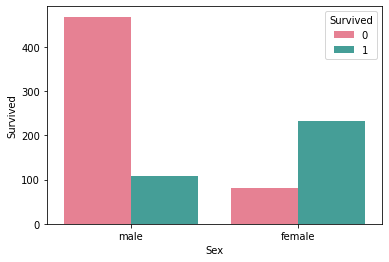

In [104]:
##Sex
# survival rate
display(train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())
# survival vs dead amount
chart = sns.barplot(x='Sex', y='Survived', hue = 'Survived', estimator=len, palette="husl", data=train, ci=None)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


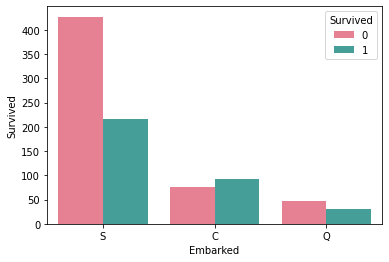

In [105]:
##Embarked
# survival rate
display(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())
# survival vs dead amount
chart = sns.barplot(x='Embarked', y='Survived', hue = 'Survived', estimator=len, palette="husl", data=train, ci=None)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


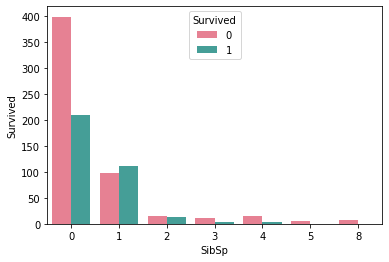

In [106]:
##SipSp
# survival rate
display(train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean())
# survival vs dead amount
chart = sns.barplot(x='SibSp', y='Survived', hue = 'Survived', estimator=len, palette="husl", data=train, ci=None)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


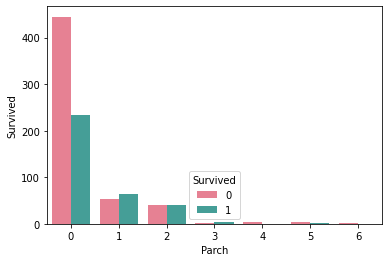

In [107]:
##Parch 
# urvival rate
display(train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean())
# survival vs dead amount
chart = sns.barplot(x='Parch', y='Survived', hue = 'Survived', estimator=len, palette="husl", data=train, ci=None)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


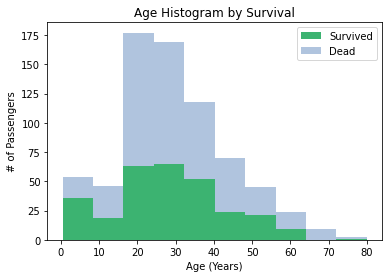

In [108]:
##Age(1)
##survival vs dead amount
plt.subplot()
plt.hist(x = [train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], 
         stacked=True, color = ['mediumseagreen','lightsteelblue'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

Text(0.5, 0.98, 'Survived Popularity Distribution')

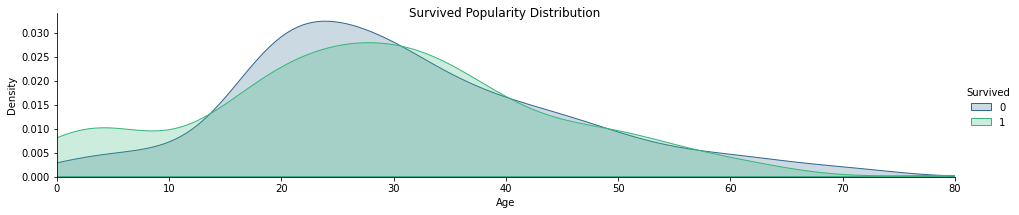

In [109]:
##Age(2)
g = sns.FacetGrid(train, hue = "Survived", aspect = 4.5, palette = "viridis")
g.map(sns.kdeplot, 'Age', shade = True)
g.set(xlim=(0,train['Age'].max()))
g.add_legend()
g.fig.suptitle('Survived Popularity Distribution')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


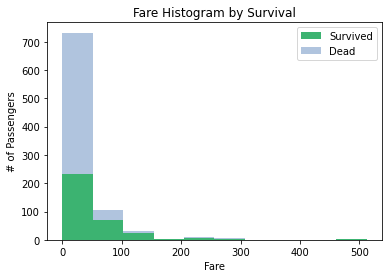

In [110]:
##Fare(1)
plt.subplot()
plt.hist(x = [train[train['Survived']==1]["Fare"], train[train['Survived']==0]["Fare"]], 
         stacked=True, color = ['mediumseagreen','lightsteelblue'],label = ['Survived','Dead'], rwidth = 50)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.legend()

Text(0.5, 0.98, 'Fare Distribution')

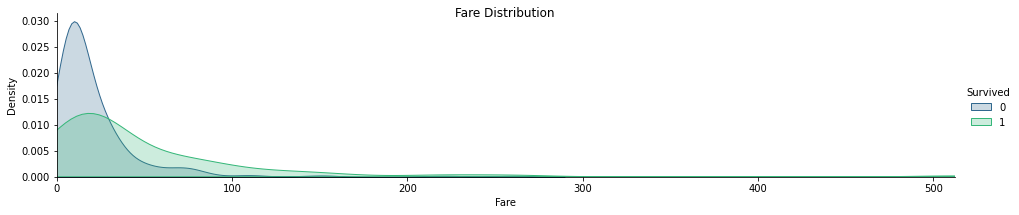

In [111]:
##Fare(2)
f = sns.FacetGrid(train, hue = "Survived", aspect = 4.5, palette = "viridis")
f.map(sns.kdeplot, "Fare", shade = True)
f.set(xlim=(0,train["Fare"].max()))
f.add_legend()
f.fig.suptitle('Fare Distribution')

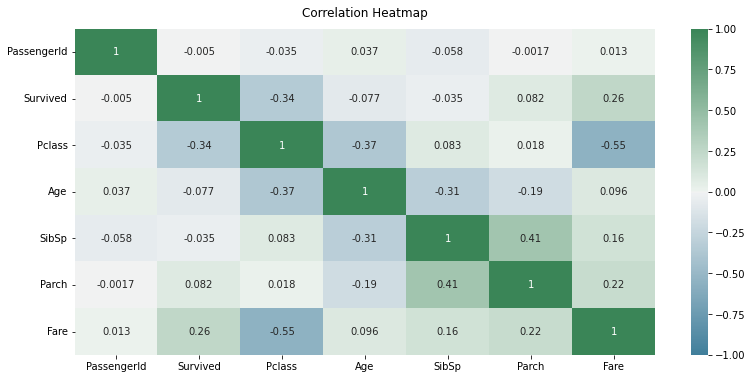

In [112]:
##Corr matrix of the original features (there will be a new one later based on new features)
plt.figure(figsize=(13, 6))
colormap = sns.diverging_palette(589, 140, as_cmap = True)
corr_heatmap = sns.heatmap(train.corr(),vmin=-1, vmax=1, annot=True, cmap=colormap)
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

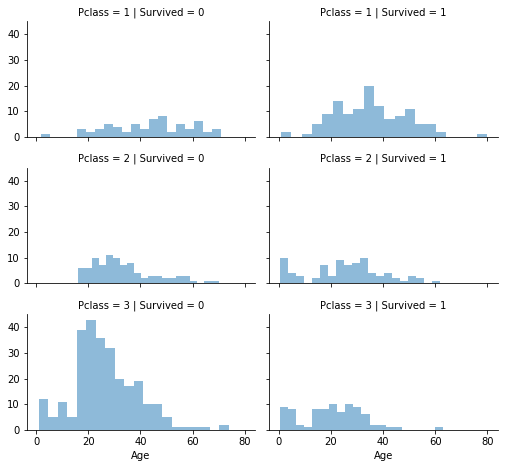

In [113]:
##Even though we can see that Fare has relatively high corr with Survived and Age,
# the original distribution of Fare is tooooo sparse. So the grap cannot show the corr very well.

##Then, let's check out the relationship between original Pclass, Age and Survival.
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6, palette = 'pastel')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

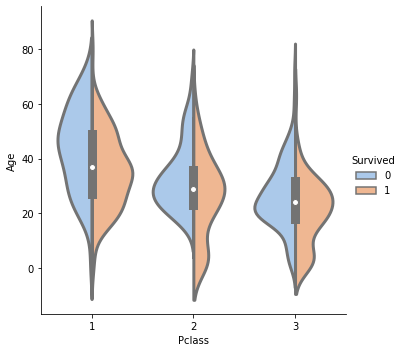

In [114]:
#Here is another way to show these three columns.
sns.catplot(x='Pclass', y='Age', hue = 'Survived', data = train, split = True, kind="violin",  palette = 'pastel', linewidth = 3)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


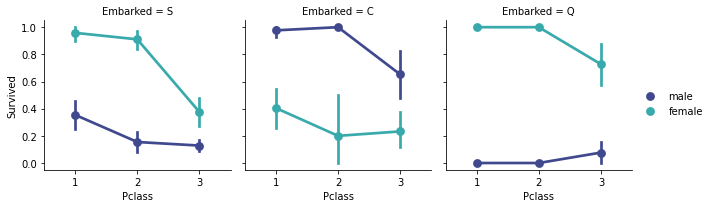

In [115]:
#The corr matrix doesn't include Embarked but when we group by Pclass and sex, we can get some interesting results.
e = sns.FacetGrid(train, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = "mako")
e.add_legend()

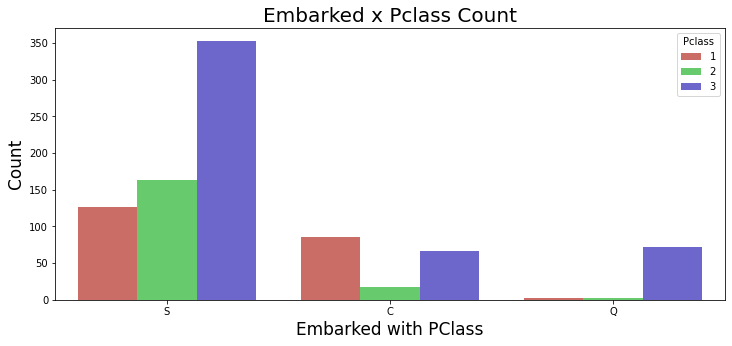

In [116]:
plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=train, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass Count', fontsize=20)
plt.xlabel('Embarked with PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

# Clean data 

In [117]:
print('Train set missing data:')
print(train.isnull().sum())
print('')
print('Test set missing data:')
print(test.isnull().sum())

Train set missing data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test set missing data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [118]:
#combine train and test data set
train['istrain'] = 1
test['istrain'] = 0
test['Survived'] = np.nan

comb = pd.concat([train, test])
comb = comb.reset_index(drop = True)
print(comb.shape)
comb.head()

(1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,istrain
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [119]:
np.isnan(comb.loc[6,"Age"])

False

In [120]:
#Filling missing values in comb dataset
comb['Embarked'].fillna(comb['Embarked'].mode()[0], inplace = True)
 
# Age
for i in range(comb.shape[0]):
  if np.isnan(comb.loc[i,"Age"]):
    filter_sex = comb.loc[i,'Sex']
    filter_embarked = comb.loc[i,'Embarked']

    comb.loc[i,"Age"] = comb[(comb['Embarked']== filter_embarked) & (comb['Sex']== filter_sex)]['Age'].median()

# Fare
comb['Fare'].fillna(comb['Fare'].median(), inplace = True)

In [121]:
comb.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
istrain           0
dtype: int64

In [122]:
#comb.age -> bin into 5 ranges
comb['Age_class'] = pd.cut(comb['Age'].astype(int), 5)

In [123]:
##name -> titles (new feature)
comb['name_title'] = comb.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(comb['name_title'].value_counts())

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: name_title, dtype: int64


In [124]:
comb['title_diff'] = comb.name_title.apply(lambda x: 'rare' if x not in ['Mr','Miss','Mrs', 'Master'] else x)
comb['title_diff'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
rare       34
Name: title_diff, dtype: int64

Text(0.5, 1.0, 'title_diff')

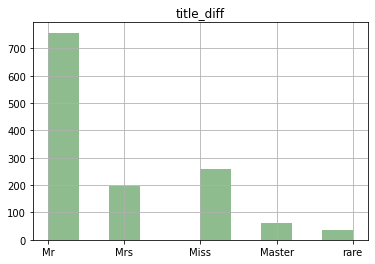

In [125]:
comb['title_diff'].hist(color = 'darkseagreen')
plt.title('title_diff')

In [126]:
# Cabin -> get the first letter
comb['cabin_letter'] = comb.Cabin.apply(lambda x: str(x)[0])
comb['cabin_letter'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_letter, dtype: int64

Text(0.5, 1.0, 'cabin_letter')

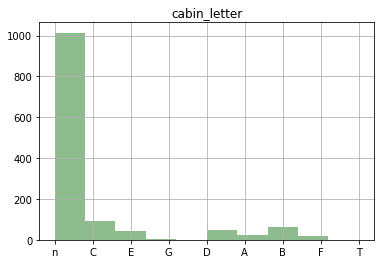

In [127]:
comb['cabin_letter'].hist(color = 'darkseagreen')
plt.title('cabin_letter')

In [128]:
# Ticket -> (numeric_ticket)
comb['ticket_isnumeric'] = comb.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
print(comb['ticket_isnumeric'].value_counts(), '\n')

comb['ticket_letters'] = comb.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
print(comb['ticket_letters'].value_counts())
# We can see from the following output that 'ticket_letters' data is kind of chaotic, so we decide not to use this feature.

1    957
0    352
Name: ticket_isnumeric, dtype: int64 

0            961
pc            92
ca            68
a5            28
sotonoq       24
stono2        21
scparis       19
wc            15
a4            10
fcc            9
soc            8
c              8
sopp           7
pp             4
scah           4
wep            4
fc             3
sotono2        3
sca4           2
swpp           2
ppp            2
sc             2
casoton        1
lp             1
a2             1
aq4            1
stonoq         1
sca3           1
sop            1
fa             1
scahbasle      1
as             1
sp             1
scow           1
aq3            1
Name: ticket_letters, dtype: int64


In [142]:
comb['ticket_diff'] = comb.ticket_letters.apply(lambda x: 'others' if x not in ['pc','ca', 'a5', 'sotonoq', 'stono2', 'scparis', 'wc', 'a4', 'fcc', 'soc', 'c', 'sopp'] else x)
comb['ticket_diff'] = comb.ticket_diff.apply(lambda x: np.nan if x in ['others'] else x)
comb['ticket_diff'].value_counts()

pc         92
ca         68
a5         28
sotonoq    24
stono2     21
scparis    19
wc         15
a4         10
fcc         9
soc         8
c           8
sopp        7
Name: ticket_diff, dtype: int64

Text(0.5, 1.0, 'ticket_diff')

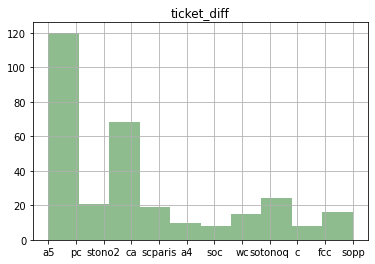

In [143]:
comb['ticket_diff'].hist(color = 'darkseagreen')
plt.title('ticket_diff')

In [33]:
comb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,istrain,Age_class,name_title,title_diff,cabin_letter,ticket_isnumeric,ticket_letters
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.0, 32.0]",Mr,Mr,n,0,a5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"(32.0, 48.0]",Mrs,Mrs,C,0,pc
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(16.0, 32.0]",Miss,Miss,n,0,stono2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(32.0, 48.0]",Mrs,Mrs,C,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(32.0, 48.0]",Mr,Mr,n,1,0


# Preprocess data

In [34]:
# Categorical data
la = preprocessing.LabelEncoder()
comb['Pclass'] = la.fit_transform(comb['Pclass'])
comb['Sex'] = la.fit_transform(comb['Sex'])
comb['Age_class'] = la.fit_transform(comb['Age_class'])
comb['Embarked'] = la.fit_transform(comb['Embarked'])
comb['title_diff'] = la.fit_transform(comb['title_diff'])
comb['cabin_letter'] = la.fit_transform(comb['cabin_letter'])
# comb['ticket_letters'] = la.fit_transform(comb['ticket_letters'])

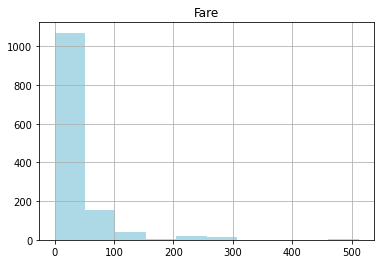

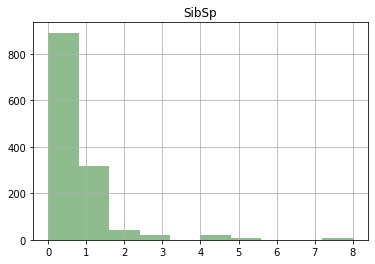

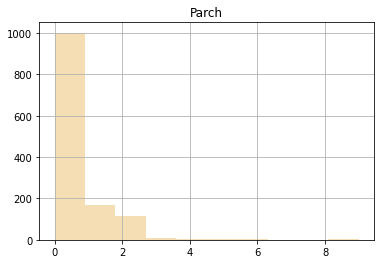

In [35]:
comb['Fare'].hist(color ='lightblue')
plt.title('Fare')
plt.show()
comb['SibSp'].hist(color = 'darkseagreen')
plt.title('SibSp')
plt.show()
comb['Parch'].hist(color = 'wheat')
plt.title('Parch')
plt.show()

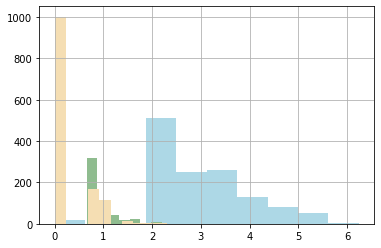

In [36]:
# Numerical data
comb['norm_fare'] = np.log(comb.Fare + 1)
comb['norm_sibsp'] = np.log(comb.SibSp + 1)
comb['norm_Parch'] = np.log(comb.Parch + 1)

comb['norm_fare'].hist(color ='lightblue')
comb['norm_sibsp'].hist(color = 'darkseagreen')
comb['norm_Parch'].hist(color = 'wheat')

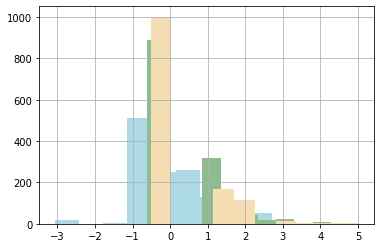

In [37]:
# Numerical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
comb[['norm_sibsp','norm_Parch','norm_fare']] = sc.fit_transform(comb[['norm_sibsp','norm_Parch','norm_fare']])

comb['norm_fare'].hist(color ='lightblue')
comb['norm_sibsp'].hist(color = 'darkseagreen')
comb['norm_Parch'].hist(color = 'wheat')

In [38]:
#divide comb to train and test 
X_train0 = comb[comb.istrain == 1]
X_train = X_train0[['Pclass', 'Sex', 'Embarked', 'norm_fare', 'Age_class', 'title_diff', 'cabin_letter', 'ticket_isnumeric', 'norm_sibsp', 'norm_Parch']]
y_train = X_train0.Survived

X_test0 = comb[comb.istrain == 0]
X_test = X_test0[['Pclass', 'Sex', 'Embarked', 'norm_fare', 'Age_class', 'title_diff', 'cabin_letter', 'ticket_isnumeric', 'norm_sibsp', 'norm_Parch']]
y_test = X_test0.Survived

# X_train1 = X_train.astype({"Pclass": str})
# X_train1 = pd.get_dummies(X_train0[['Pclass', 'Sex', 'Embarked', 'Age_class', 'title_diff', 'cabin_letter', 'ticket_isnumeric']])

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
X_train.head()

X_train: (891, 10)
y_train: (891,)
X_test: (418, 10)
y_test: (418,)


,Pclass,Sex,Embarked,norm_fare,Age_class,title_diff,cabin_letter,ticket_isnumeric,norm_sibsp,norm_Parch
0,2,1,2,-0.897786,1,2,8,0,0.932011,-0.518791
1,0,0,0,1.344455,2,3,2,0,0.932011,-0.518791
2,2,0,2,-0.816539,1,1,8,0,-0.615607,-0.518791
3,0,0,2,1.045102,2,3,2,1,0.932011,-0.518791
4,2,1,2,-0.802170,2,2,8,1,-0.615607,-0.518791


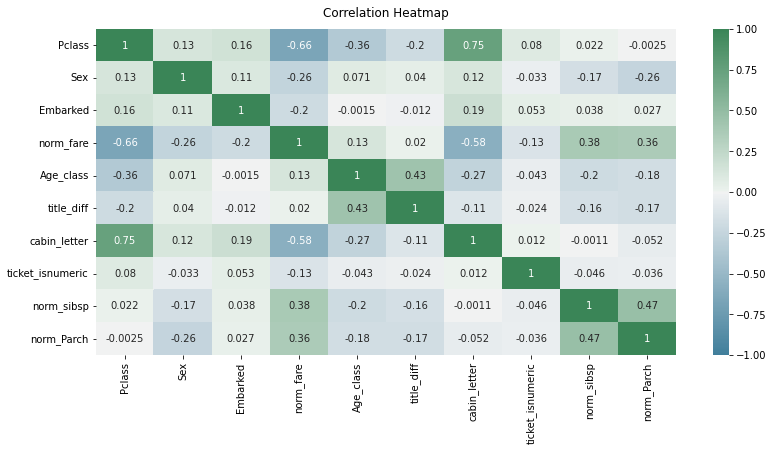

In [39]:
plt.figure(figsize=(13, 6))
colormap = sns.diverging_palette(589, 140, as_cmap = True)
corr_heatmap = sns.heatmap(X_train.corr(),vmin=-1, vmax=1, annot=True, cmap=colormap)
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [40]:
X_train = pd.get_dummies(X_train, columns = ['Pclass' , 'Embarked', 'title_diff','cabin_letter'], prefix = ['Pclass', 'Embarked', 'title_diff','cabin_letter'] )
X_test = pd.get_dummies(X_test, columns = ['Pclass', 'Embarked', 'title_diff','cabin_letter'], prefix = ['Pclass', 'Embarked', 'title_diff','cabin_letter'])
#! Here we didn't include Age_class because its order is meaningful.
print(X_train.shape)
print(X_test.shape) #X_test doesn't have 'cabin_letter_7' column
X_train.head()

(891, 26)
(418, 25)


,Sex,norm_fare,Age_class,ticket_isnumeric,norm_sibsp,norm_Parch,Pclass_0,Pclass_1,Pclass_2,Embarked_0,...,title_diff_4,cabin_letter_0,cabin_letter_1,cabin_letter_2,cabin_letter_3,cabin_letter_4,cabin_letter_5,cabin_letter_6,cabin_letter_7,cabin_letter_8
0,1,-0.897786,1,0,0.932011,-0.518791,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1.344455,2,0,0.932011,-0.518791,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,-0.816539,1,0,-0.615607,-0.518791,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.045102,2,1,0.932011,-0.518791,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,-0.802170,2,1,-0.615607,-0.518791,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# Modeling

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
##Basic models

#Gaussian Naive Bayes
nb = GaussianNB()
nb_acc = cross_val_score(nb,X_train,y_train,cv=5).mean()

#Logistic Regression
lr = LogisticRegression(max_iter = 2000)
lr_acc = cross_val_score(lr,X_train,y_train,cv=5).mean()

#Linear perceptron classifier
pp = Perceptron()
pp_acc = cross_val_score(pp,X_train,y_train,cv=5).mean()

#Linear classifiers with stochastic gradient descent (SGD) learning
sgd = SGDClassifier()
sgd_acc = cross_val_score(sgd,X_train,y_train,cv=5).mean()

#Decision tree classifier.
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_acc = cross_val_score(dt,X_train,y_train,cv=5).mean()

#K-Neighbours classifier
knn = KNeighborsClassifier()
knn_acc = cross_val_score(knn,X_train,y_train,cv=5).mean()

#Random Forest classifier
rf = RandomForestClassifier(random_state = 1)
rf_acc = cross_val_score(rf,X_train,y_train,cv=5).mean()

#Support Vector Classification (accoring to ONE VS ONE)
svc = SVC(probability = True)
svc_acc = cross_val_score(svc,X_train,y_train,cv=5).mean()

#XGBoost classification
xgb = XGBClassifier(random_state =1)
xgb_acc = cross_val_score(xgb,X_train,y_train,cv=5).mean()

basic_model = pd.DataFrame({
    'classifier':['GaussianNB', 'LogisticRegression', 'Perceptron', 'SGD', 'DecisionTree', 'KNN', 'RandomForest', 'SVM', 'XGB'],
    'accuracy': [nb_acc, lr_acc, pp_acc, sgd_acc, dt_acc, knn_acc, rf_acc, svc_acc, xgb_acc]
})

basic_model['accuracy'] = round(basic_model['accuracy'] * 100, 2)
basic_model.sort_values(by = 'accuracy', ascending = False)

,classifier,accuracy
7,SVM,82.60
8,XGB,82.60
6,RandomForest,81.93
1,LogisticRegression,81.03
5,KNN,80.81
4,DecisionTree,80.58
2,Perceptron,75.65
3,SGD,73.63
0,GaussianNB,73.18


In [ ]:
#Tune models 
def tuned_performance(classifier, model_name):
    print(model_name)
    print('Best Accuracy: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
#Tuned model - KNN (Rank 5)
#   n_neighbors: default=5;
#   weights: weight function used in prediction. Possible values
#            {‘uniform’, ‘distance’} or callable, default=’uniform’;
#   algorithm: algorithm used to compute the nearest neighbors,
#             {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’;
#   leaf_size: default=30;
#   p: power parameter for the Minkowski metric, minkowski_distance (l_p) is used;
#    n_jobs: the number of parallel jobs to run for neighbors search, 
#            none means 1 unless in a joblib.parallel_backend context,
#            -1 means using all processors.
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
param_grid = {'n_neighbors' : [3,5,7,9,15,30],     
              'weights' : ['uniform', 'distance'],
              'leaf_size': [10,20,30,40,50],
              'algorithm': ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2,3]}
knn = KNeighborsClassifier()
knnt = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
clf_knnt = knnt.fit(X_train,y_train)
tuned_performance(clf_knnt,'KNN')

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
KNN
Best Accuracy: 0.8181658401858012
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [ ]:
#Tuned model - Logistic Regression (Rank 4)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
param_grid = {'max_iter' : [50, 100, 500,700,1000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4,4,num=10,base=2.0),
              'solver' : ['liblinear']}
lr = LogisticRegression()
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
clf_lrt = clf_lr.fit(X_train,y_train)
tuned_performance(clf_lrt,'Logistic Regression')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression
Best Accuracy: 0.8193019898311469
Best Parameters: {'C': 0.1157343390359113, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Tune model - Random Forest (Rank 3)
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
param_grid =  {'n_estimators': [200,250,350,450,500,550],
               'criterion':['gini','entropy'],
               'bootstrap': [True],
               'max_depth': [15, 20, 25],
               'max_features': ['auto','sqrt', 10],
               'min_samples_leaf': [2,3,4],
               'min_samples_split': [2,3,4]}

rf = RandomForestClassifier(random_state = 1)                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
clf_rft = clf_rf.fit(X_train,y_train)
tuned_performance(clf_rft,'Random Forest')

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Random Forest
Best Accuracy: 0.8361496453455526
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 350}


In [ ]:
#Tune model - XGB (Rank 2)
#https://xgboost.readthedocs.io/en/stable/parameter.html
param_grid = {
    'n_estimators': [250,350,450,550],
    'colsample_bytree': [0.5,0.7, 0.9, 1],
    'scale_pos_weight': [0.7,0.8,0.9,1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,1.5, 2],
    'sampling_method': ['uniform']
}

xgb = XGBClassifier(random_state = 1)

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
clf_xgbt = clf_xgb.fit(X_train,y_train)
tuned_performance(clf_xgbt,'XGB')

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
XGB
Best Accuracy: 0.8417738999435063
Best Parameters: {'colsample_bytree': 0.5, 'gamma': 1.5, 'learning_rate': 0.5, 'n_estimators': 450, 'reg_lambda': 10, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.6}


In [ ]:
#Tuned model - SVM (Rank 1)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.5,1, 2,5,10],
                                  'C': np.logspace(0,4,num=10,base=2.0)},
                                 {'kernel': ['linear'], 'C': np.logspace(0,4,num=10,base=2.0)},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': np.logspace(0,4,num=10,base=2.0)}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
clf_svct = clf_svc.fit(X_train,y_train)
tuned_performance(clf_svct,'SVC')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
SVC
Best Accuracy: 0.8271483271608814
Best Parameters: {'C': 1.0, 'degree': 3, 'kernel': 'poly'}


In [ ]:
tuned_model = pd.DataFrame({
    'classifier_tuned':['SVM_tuned', 'XGB_tuned', 'RandomForest_tuned', 'LogisticRegression_tuned', 'KNN_tuned'],
    'accuracy': [clf_svct.best_score_, clf_xgbt.best_score_, clf_rft.best_score_, clf_lrt.best_score_, clf_lrt.best_score_ ]
})

tuned_model['accuracy'] = round(tuned_model['accuracy'] * 100, 2)
tuned_model['accuracy_before'] = [xgb_acc,  rf_acc, svc_acc, lr_acc, knn_acc ]
tuned_model['accuracy_before'] = round(tuned_model['accuracy_before'] * 100, 2)
tuned_model.sort_values(by = 'accuracy', ascending = False)

,classifier_tuned,accuracy,accuracy_before
1,XGB_tuned,84.18,81.93
2,RandomForest_tuned,83.61,82.60
0,SVM_tuned,82.71,82.60
3,LogisticRegression_tuned,81.93,81.03
4,KNN_tuned,81.93,80.81


# Predict y_test

In [82]:
#As be mentioned right before 'Modeling' part, X_test doesn't have 'cabin_letter_7' column,
# so we need to match X_test with X_train.
X_test['cabin_letter_7'] = 0
titles_test = list(X_test.columns)
titles_test[-2], titles_test[-1] = titles_test[-1], titles_test[-2] 
X_test = X_test[titles_test]

In [86]:
# XBG 
#Best Parameters: {'colsample_bytree': 0.5, 'gamma': 1.5, 'learning_rate': 0.5, 'n_estimators': 450, 'reg_lambda': 10, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.6}

model_tuned_xgb = XGBClassifier(random_state = 1, colsample_bytree=0.5, gamma=1.5, learning_rate=0.5, n_estimators=450, reg_lambda=10, sampling_method= 'uniform', scale_pos_weight= 1, subsample=0.6)
model_tuned_xgb.fit(X_train, y_train)

# Predict for test data sample
pre = model_tuned_xgb.predict(X_test)
result_df = test.copy()
result_df['Survived'] = pre
output_xgb = result_df[['PassengerId','Survived']]
output_xgb = output_xgb.astype(int)

output_xgb.to_csv('submission_xgb.csv', index=False)

In [88]:
#Random forest
#Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 350}
model_tuned_rf = RandomForestClassifier(random_state = 1, bootstrap =  True, criterion = 'entropy', max_depth = 15, max_features= 10, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 350) 
model_tuned_rf.fit(X_train, y_train)

# Predict for test data sample
pre = model_tuned_rf.predict(X_test)
result_rf_df = test.copy()
result_rf_df['Survived'] = pre
output_rf = result_rf_df[['PassengerId','Survived']]
output_rf = output_rf.astype(int)

output_rf.to_csv('submission_rf.csv', index=False)

In [90]:
#SVM
#Best Parameters: {'C': 1.0, 'degree': 3, 'kernel': 'poly'}
model_tuned_svc = SVC(probability = True,C = 1.0, degree = 3, kernel = 'poly')
model_tuned_svc.fit(X_train, y_train)

pre = model_tuned_svc.predict(X_test)
result_svc_df = test.copy()
result_svc_df['Survived'] = pre
output_svc = result_svc_df[['PassengerId','Survived']]
output_svc = output_svc.astype(int)

output_svc.to_csv('submission_svc.csv', index=False)

In [91]:
#Logistic Regression
#Best Parameters: {'C': 0.1157343390359113, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
model_tuned_lr = LogisticRegression(C = 0.1157343390359113, max_iter = 50, penalty = 'l2', solver = 'liblinear')
model_tuned_lr.fit(X_train, y_train)

pre = model_tuned_lr.predict(X_test)
result_lr_df = test.copy()
result_lr_df['Survived'] = pre
output_lr = result_lr_df[['PassengerId','Survived']]
output_lr = output_lr.astype(int)

output_lr.to_csv('submission_lr.csv', index=False)

In [93]:
#KNN
#Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
model_tuned_knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 20, n_neighbors = 7, p = 1, weights = 'uniform')
model_tuned_knn.fit(X_train, y_train)

pre = model_tuned_knn.predict(X_test)
result_knn_df = test.copy()
result_knn_df['Survived'] = pre
output_knn = result_knn_df[['PassengerId','Survived']]
output_knn = output_knn.astype(int)

output_knn.to_csv('submission_knn.csv', index=False)

# Accuracy for test data set


*   XGBoost: 78.71%
*   RandomForest: 77.51%
*   SVM: 76.56%
*   LogisticRegression: 77.27%
*   KNN: 75.12%







